In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r'C:\Users\Admin\Downloads\data_banknote_authentication.csv')
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Applying standardization so that a few high-ranged features don't dominate.

In [3]:
from sklearn.preprocessing import StandardScaler
variables = ['Variance','Skewness','Kurtosis','Entropy']
x = df.loc[:,variables].values
y = df.loc[:,['Class']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3
0,1.121806,1.149455,-0.975970,0.354561
1,1.447066,1.064453,-0.895036,-0.128767
2,1.207810,-0.777352,0.122218,0.618073
3,1.063742,1.295478,-1.255397,-1.144029
4,-0.036772,-1.087038,0.736730,0.096587


In [4]:
#importing PCA module 
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3
0,-1.472805,-1.163917,-0.167253,0.325724
1,-1.639441,-1.093812,0.371187,0.150864
2,0.513919,-1.324880,0.509112,-0.425933
3,-2.310952,-0.202514,0.540781,-0.143794
4,1.193416,0.024654,0.421189,-0.364493


### Notice that there are four features in the original data and so four principal components are generated.

In [12]:
pca.explained_variance_ratio_ #retuns an array of variances

array([0.54497602, 0.32328872, 0.08784561, 0.04388965])

### Clearly, the first principal component has the highest variance value.  

In [8]:
#labelling the principal components
x_pca['Class']=y
x_pca.columns = ['PC1','PC2','PC3','PC4','Class']
x_pca.head()

,PC1,PC2,PC3,PC4,Class
0,-1.472805,-1.163917,-0.167253,0.325724,0
1,-1.639441,-1.093812,0.371187,0.150864,0
2,0.513919,-1.324880,0.509112,-0.425933,0
3,-2.310952,-0.202514,0.540781,-0.143794,0
4,1.193416,0.024654,0.421189,-0.364493,0


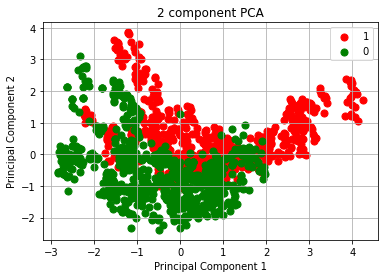

In [11]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = [1,0]
colors = ['r', 'g']
for Class, color in zip(targets,colors):
    indicesToKeep = x_pca['Class'] == Class
    ax.scatter(x_pca.loc[indicesToKeep, 'PC1']
    , x_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()